<a href="https://colab.research.google.com/github/caiodavic/Processamento-de-Linguagem-Natural-2022.1/blob/main/Treinando_Word_Embeddings_com_w2v.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Treinando Word Embeddings com Word2Vec
- Vamos treinar nosso próprio Word Embedding, a partir de livros da literatura brasileira e das notícias e sátiras que estamos trabalhando há algum tempo. Os textos dos livros da literatura podem ser encontrados [nesse link](https://www.kaggle.com/datasets/rtatman/brazilian-portuguese-literature-corpus?resource=download&select=guideToDocuments.csv) do kaggle. 

### Importando as Bibliotecas necessárias

In [ ]:
import nltk
nltk.download('punkt')
import pandas as pd
import numpy as np
from tqdm import tqdm
from nltk.tokenize import sent_tokenize, RegexpTokenizer
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')
from gensim.models.word2vec import Word2Vec
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
plt.style.use('ggplot')

from sklearn.decomposition import PCA
import numpy as np
from sklearn.manifold import TSNE

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# com essa célula o google colab consegue ler arquivos direto do google drive. 
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Leitura dos Dados

In [ ]:
# é importante alterar o caminho e colocar para onde o arquivo está salvo no seu drive
data = pd.read_csv('texts_to_w2v.csv')
data = shuffle(data)
data.sample(5)

,text
9,ministério da cultura fundação biblioteca naci...
7234,a justica federal determinou que a empresa ale...
1337,o mundo parou para ver a eliminacao do corinth...
4282,funcionarios da petrobras resolveram fazer uma...
7876,brasilia o planalto atua nos bastidores para e...


### Preparação dos dados
- Para poder treinarmos e construir nosso Word Embedding, precisamos juntar todos os textos e separa-los por sentença. Além disso, precisamos também tokenizar nossas sentenças em palavras.

In [ ]:
texts_sentences_tokenized = []
for i,r in tqdm(data.iterrows()):
  sents = sent_tokenize(r['text'])
  for sent in sents:
    texts_sentences_tokenized.append(tokenizer.tokenize(sent))

10081it [00:11, 847.57it/s] 


In [ ]:
' '.join(i for i in texts_sentences_tokenized[10])

'o supremo tribunal federal nao e campo de futebol para voce ficar dando pitaco ficar escalando posicao'

In [ ]:
num_features = 300 # dimensão dos embeddings
min_word_count = 3 # quantidade mínima de vezes que a palavra deve aparecer na coleção para participar da matriz
num_workers = 2 # relacionado a paralelização do treinamento
window_size = 6 # distância máxima entre a palavra atual e a prevista em uma frase.

In [ ]:
model = Word2Vec(texts_sentences_tokenized, workers=num_workers, size=num_features, min_count=min_word_count, window=window_size)

- Com os embeddings treinados, podemos obter palavras mais similares ou mais contrárias a outras, fazer analogias entre outros.

In [ ]:
model.wv.most_similar(positive=['twitter'],topn=5)

[('instagram', 0.909907341003418),
 ('facebook', 0.8781212568283081),
 ('youtube', 0.8668615818023682),
 ('estadao', 0.8011918067932129),
 ('postou', 0.7736414074897766)]

In [ ]:
model.wv.most_similar(positive=['futebol','samba'], topn=5)

[('show', 0.7838740348815918),
 ('time', 0.7782477140426636),
 ('estadio', 0.7690740823745728),
 ('campeonato', 0.7682861089706421),
 ('maracana', 0.7640498876571655)]

In [ ]:
model.wv.doesnt_match("amor afeto carinho odio".split())

'odio'

In [ ]:
model.wv.most_similar(positive=['amor','odio'], negative=['carinho'])

[('violencia', 0.543262779712677),
 ('universo', 0.5405163764953613),
 ('legalizacao', 0.537611186504364),
 ('desigualdade', 0.5348918437957764),
 ('genero', 0.528213620185852),
 ('assedio', 0.5239174365997314),
 ('desequilibrio', 0.5143077373504639),
 ('manifesto', 0.5100424289703369),
 ('pls', 0.5100049376487732),
 ('presidencialismo', 0.5098839998245239)]

In [ ]:
model.wv.most_similar(positive=['presidente','governador'], negative=['país'])

[('vicepresidente', 0.7910212278366089),
 ('senador', 0.7299736738204956),
 ('tucano', 0.7296589612960815),
 ('presidencia', 0.7115534543991089),
 ('peemedebista', 0.7068526148796082),
 ('maia', 0.7033181190490723),
 ('psol', 0.6991992592811584),
 ('petista', 0.6885181665420532),
 ('exprefeito', 0.6824061870574951),
 ('senadora', 0.6818255186080933)]

In [ ]:
model.wv.similarity('presidente','governador')

0.5809562

In [ ]:
def display_pca_scatterplot(model, words=None, sample=0):
    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.wv.vocab.keys()), sample)
        else:
            words = [ word for word in model.vocab ]
        
    word_vectors = np.array([model[w] for w in words])
    #tsne = TSNE(n_components=2)
    #twodim = tsne.fit_transform(word_vectors)[:,:2]
    twodim = PCA().fit_transform(word_vectors)[:,:2]
    
    plt.figure(figsize=(6,6))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)

<ipython-input-22-c1ee99409f78>:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  word_vectors = np.array([model[w] for w in words])


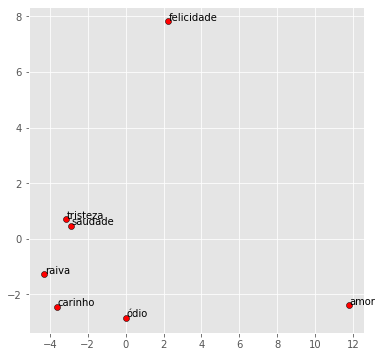

In [ ]:
display_pca_scatterplot(model, 
                        ['amor','ódio','saudade','raiva','tristeza','felicidade','carinho'])
model.vocabulary

<ipython-input-22-c1ee99409f78>:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  word_vectors = np.array([model[w] for w in words])


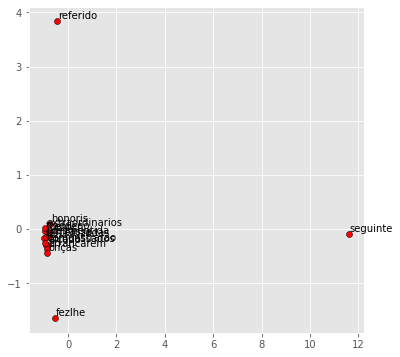

In [ ]:
display_pca_scatterplot(model, sample=15)

In [ ]:
with open('tensors.tsv', 'w') as tensors:
    with open('metadata.tsv', 'w') as metadata:
        for word in model.wv.index2word:
            metadata.write(word + '\n')
            vector_row = '\t'.join(map(str, model.wv[word]))
            tensors.write(vector_row + '\n')

In [ ]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('tensors.tsv')
  files.download('metadata.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>